# 箱型图
绘制五大要素：中位数，上四分位数，下四分位数，上限，下限。
除此之外不在这个上下限范围内的数据称为异常值。

作用：

1.可以很直接的识别出数据中的异常值

2.判断数据批的偏态和尾重

3.比较数据形状

其中第一个作用可以明显得出，因为箱型图已经把属于非异常值的范围划分好了，在这个范围之外的点就是异常点。
关于第二点作用：正常情况下，中位数位于上下四分位数的中央,箱线图的方盒关于中位线对称。
当出现偏态时，尾部越重（也就是偏度作图中线条拖得很长，平缓的一边），越有可能出现异常值。
异常值集中在较小值一侧，则分布呈现左偏态；；异常值集中在较大值一侧，则分布呈现右偏态。

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

C:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


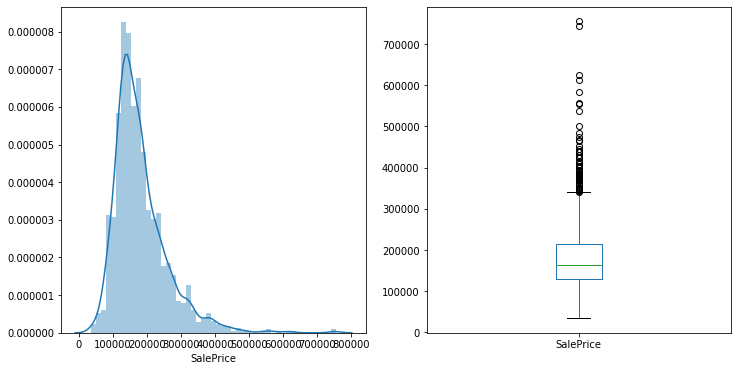

In [2]:
# 以房价预测中的数据为例
data_train = pd.read_csv("./train.csv")

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(data_train['SalePrice'])
plt.subplot(122)
data_train['SalePrice'].plot(kind='box')

通过这两个子图的对比就可以看出上面讲到作用了，在左图中可以明显看出数据是右偏的，尾部（也就是数值大的部分）拖得很长，那么异常点可能很多，且异常点会出现在数值较大的一边。恰恰这些都可以从箱型图中读出。

至于绘制箱型图有多种方法

方法一：Series.plot()这个方法也就是上面对比图所用到的方法。

方法二：seaborn.boxplot()

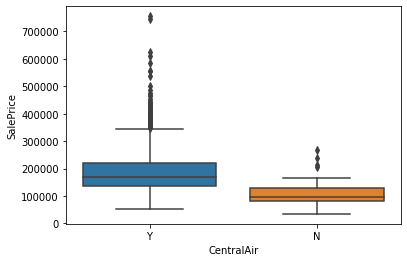

In [3]:
data = pd.concat([data_train["CentralAir"], data_train["SalePrice"]], axis=1)  # axis=1行对其，将不同列名称的表合并
fig = sns.boxplot(x='CentralAir', y="SalePrice", data=data)

方法三：DataFrame.boxplot()这个同样也可以实现同样的效果，而且可以利用到参数by来指定分组
依据不用想上面要利用到pd.concat方法来合并，参数column表示我们要绘制成箱型图的数据

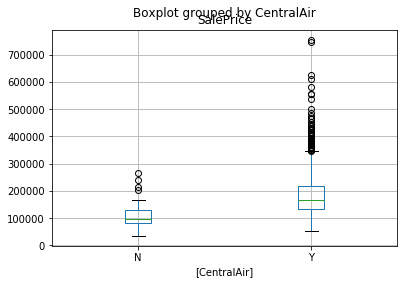

In [4]:
fig,axes = plt.subplots()
data_train.boxplot(column="SalePrice",by=["CentralAir"], ax=axes)

当然还有很多方法，这里只是Series、DataFrame、seaborn中的方法各讲一个。